## 基礎建設

In [194]:
import pandas as pd
import gzip, json
import matplotlib.pyplot as plt

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

## 載入資料

In [152]:
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/All_Beauty.csv
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_All_Beauty.json.gz

In [153]:
metadata = getDF('data/meta_All_Beauty.json.gz')
ratings = pd.read_csv('data/All_Beauty.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'], header=None)

In [154]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [155]:
ratings.head()

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800
2,0143026860,A1572GUYS7DGSR,4.0,1407628800
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200


## 資料整理

In [156]:
ratings['DATE'] = pd.to_datetime(ratings['unixReviewTime'], unit='s')

## 資料切分

In [157]:
ratings_trainings = ratings[
    (ratings['DATE'] < '2018-09-01')
]
ratings_testings = ratings[
    (ratings['DATE'] >= '2018-09-01') & 
    (ratings['DATE'] <= '2018-09-30')
]
ratings_testings_by_user = ratings_testings.groupby('reviewerID').agg(list).reset_index()[['reviewerID', 'asin']].to_dict('records')
ratings_testings_by_user = { rating['reviewerID']: rating['asin'] for rating in ratings_testings_by_user }
users = list(ratings_testings_by_user.keys())

## 資料清理

In [158]:
ratings_trainings

,asin,reviewerID,overall,unixReviewTime,DATE
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000,2015-02-19
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800,2014-12-18
2,0143026860,A1572GUYS7DGSR,4.0,1407628800,2014-08-10
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000,2013-03-11
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200,2011-12-25
...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1500508800,2017-07-20
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1489622400,2017-03-16
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1488326400,2017-03-01
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1487635200,2017-02-21


## EDA
濾出每個人的評論數

In [159]:
ratings_trainings['YYYY-MM'] = ratings_trainings['DATE'].dt.strftime('%Y-%m')
ratings_trainings

/var/folders/bg/xxg6qbpn4ll_hcgqp_vlb_wh0000gp/T/ipykernel_11581/3466335689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_trainings['YYYY-MM'] = ratings_trainings['DATE'].dt.strftime('%Y-%m')


,asin,reviewerID,overall,unixReviewTime,DATE,YYYY-MM
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000,2015-02-19,2015-02
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800,2014-12-18,2014-12
2,0143026860,A1572GUYS7DGSR,4.0,1407628800,2014-08-10,2014-08
3,0143026860,A1PSGLFK1NSVO,5.0,1362960000,2013-03-11,2013-03
4,0143026860,A6IKXKZMTKGSC,5.0,1324771200,2011-12-25,2011-12
...,...,...,...,...,...,...
371340,B01HJEGTYK,A202DCI7TV1022,1.0,1500508800,2017-07-20,2017-07
371341,B01HJEGTYK,A3FSOR5IJOFIBE,5.0,1489622400,2017-03-16,2017-03
371342,B01HJEGTYK,A1B5DK6CTP2P24,5.0,1488326400,2017-03-01,2017-03
371343,B01HJEGTYK,A23OUYS5IRMJS9,2.0,1487635200,2017-02-21,2017-02


In [160]:
# ratings_trainings.groupby('reviewerID').agg(review_count=('asin', 'count'))
# ratings_trainings['YYYY-MM'] = ratings_trainings['DATE'].dt.strftime('%Y-%m')
# df = ratings_trainings.groupby(['YYYY-MM']).agg(review_count=('asin', 'count')).reset_index()
# plt.plot(df['YYYY-MM'], df['review_count'])

def quarter(row):
  y = row['DATE'].strftime('%Y')
  m = row['DATE'].strftime('%m')
  if '01' <= m <= '03':
      q = '1'
  elif '04' <= m <= '06':
      q = '2'
  elif '07' <= m <= '09':
      q = '3'
  else:
      q = '4'
  return f'{y}-{q}'
ratings_trainings['YYYY-Q'] = ratings_trainings.apply(lambda row: quarter(row), axis=1)

/var/folders/bg/xxg6qbpn4ll_hcgqp_vlb_wh0000gp/T/ipykernel_11581/1856305984.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_trainings['YYYY-Q'] = ratings_trainings.apply(lambda row: quarter(row), axis=1)


Text(0, 0.5, 'reviewer_count')

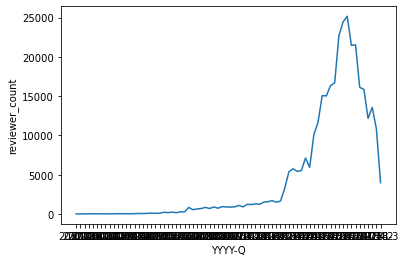

In [161]:
# 評論人數
df = ratings_trainings.groupby(['YYYY-Q']).agg(reviewers=('reviewerID', set)).reset_index()
def compute_reviewer_count(row):
    if type(row['reviewers']) is set:
        return len(row['reviewers'])
    else:
        return 0
df['reviewer_count'] = df.apply(lambda row: compute_reviewer_count(row), axis=1)
plt.plot(df['YYYY-Q'], df['reviewer_count'])
plt.xlabel('YYYY-Q')
plt.ylabel('reviewer_count')

2014-3 - 2018-2 期間的評論人數大於 10000

2014-3 - 2018-2 期間的評論人數大於 10000


Text(0, 0.5, 'reviewer_count')

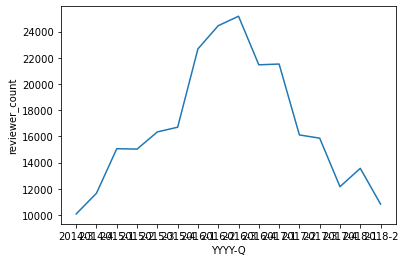

In [162]:
reviewer_count_threshold = 10000
min_date = df[df['reviewer_count'] > reviewer_count_threshold]['YYYY-Q'].min()
max_date = df[df['reviewer_count'] > reviewer_count_threshold]['YYYY-Q'].max()
print('%s - %s 期間的評論人數大於 %s' % (min_date, max_date, reviewer_count_threshold))
df_partial = df[df['YYYY-Q'] >= min_date]
df_partial = df_partial[df_partial['YYYY-Q']  <= max_date]
plt.plot(df_partial['YYYY-Q'], df_partial['reviewer_count'])
plt.xlabel('YYYY-Q')
plt.ylabel('reviewer_count')

2014-3 - 2018-2 期間有多少人?

In [226]:
ratings_trainings_partial = ratings_trainings[ratings_trainings['YYYY-Q'] >= min_date]
ratings_trainings_partial = ratings_trainings_partial[ratings_trainings_partial['YYYY-Q'] <= max_date]
ratings_trainings_users = list(set(ratings_trainings_partial['reviewerID'].tolist()))
total_trainings_users = len(set(ratings_trainings['reviewerID'].tolist()))
print('訓練資料多少人? %s' % total_trainings_users)
print('2014-3 - 2018-2 期間有多少人? %s (%.7s %%)' % (len(ratings_trainings_users), len(ratings_trainings_users)/total_trainings_users * 100))

inter_users = set(ratings_trainings_users) & set(users)
print('2014-3 - 2018-2 期間的人有含蓋 %.7s %% 的測試者，共 %s 人' % (len(inter_users)/len(users) * 100, len(inter_users)))
inter_users

訓練資料多少人? 323489
2014-3 - 2018-2 期間有多少人? 259103 (80.0963 %)
2014-3 - 2018-2 期間的人有含蓋 5.30821 % 的測試者，共 31 人


{'A16Y7V1CZCWKFV',
 'A19503XX7GU6J2',
 'A1EY751AUVO5NZ',
 'A1PR178735XC70',
 'A1SA3N793WT2LM',
 'A1TP9JHTIY468V',
 'A1WEFBEJ7OHSVZ',
 'A28E3FNV1BYC94',
 'A29834GBB4DOP1',
 'A2AAQWBJJTK3E1',
 'A2GFPTQ4VWDX96',
 'A2IMJV0CQMZLGC',
 'A2IOBG1ERS4JP3',
 'A2JCBLTLYDPQLW',
 'A2M4YSOJZELJ6N',
 'A2XY3CJ3ZCAD03',
 'A3BE6JK97CYAGA',
 'A3BT1WLPENXMD6',
 'A3H8Z7JS7XJHJJ',
 'A3JEQJCEMX20GI',
 'A4IQXCCXDEAKW',
 'A7JUHUYLXIUVQ',
 'A7Y4ETTLARUGI',
 'ACE1ZIOI3U6PY',
 'AGRZQOBCF8H87',
 'AITF34BGBMVJJ',
 'AK7YIZE6ZZ1N9',
 'ANR73TPVBCQ9K',
 'AQYL4TDY2HU8Z',
 'ASGIVOW34XNQS',
 'ATJRZUXNWAWIK'}

{'A16Y7V1CZCWKFV'}

## 產生推薦

In [172]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

# header: user_id,item_id,rating,timestamp

def recommender(training_data, users=[], k=10):

    # loading data from dataframe
    # user_to_items dict:
    # {
    #   'user': {
    #       'item': ratings...
    #   }...
    # }
    user_to_items = defaultdict(dict)
    for _, row in training_data.iterrows():
        row = dict(row)
        user = row['reviewerID']
        item = row['asin']
        rating = float(row['overall'])

        user_to_items[user][item] = rating

    print("total users before filtering: ", len(user_to_items))

    # remove obscure user to decrease data size
    # filtering params
    remove_obscure_user = True
    user_rating_threshold = 3
    all_users = list(user_to_items.keys())
    for user in all_users:
        ratings = user_to_items[user]
        if remove_obscure_user and len(ratings) < user_rating_threshold:
            del user_to_items[user]

    print("total users  after filtering: ", len(user_to_items))

    # generate item to user mapping dict
    # {
    #   'item': {
    #       'user': ratings...
    #   }...
    # }
    item_to_users = defaultdict(dict)
    for user, items in user_to_items.items():
        for item, rating in items.items():
            item_to_users[item][user] = rating

    # prepare data of computing user similarity 
    init_sim = lambda: [0 for _ in range(3)]
    factory = lambda: defaultdict(init_sim)
    pre_user_similarity = defaultdict(factory)
    n = len(item_to_users)
    index = 0
    for item, user_ratings in item_to_users.items():
        if len(user_ratings) > 1:
            # print(f"item: {item} have been rated by {len(user_ratings)} users progress: {index}/{n}")
            for user1, user2 in combinations(user_ratings.keys(), 2):
                xy = user_ratings[user1] * user_ratings[user2]
                xx = user_ratings[user1] ** 2
                yy = user_ratings[user2] ** 2
                pre_user_similarity[user1][user2][0] += xy
                pre_user_similarity[user1][user2][1] += xx
                pre_user_similarity[user1][user2][2] += yy

                pre_user_similarity[user2][user1][0] += xy
                pre_user_similarity[user2][user1][1] += xx
                pre_user_similarity[user2][user1][2] += yy
        index += 1

    user_similarity = {}
    for src_user in pre_user_similarity:
        user_similarity_order = []
        for dst_user, val in pre_user_similarity[src_user].items():
            xy = val[0]
            xx = val[1]
            yy = val[2]
            div = ((xx*yy) ** 0.5)
            if div == 0:
                continue
            similarity = xy / div
            if similarity < 0:
                continue
            for i, s in enumerate(user_similarity_order):
                target_similarity = s[1]
                if target_similarity < similarity:
                    user_similarity_order.insert(i, (dst_user, similarity))
                    break
            else:
                user_similarity_order.append((dst_user, similarity))
        user_similarity[src_user] = user_similarity_order

    recommendation = {}
    for user in users:
        if user in user_similarity:
            sim_users = user_similarity[user]
            recommended_items = []
            recommended_items_set = set()
            user_have_rated = set(user_to_items[user])
            stop_recommend = False
            for sim_user, _ in sim_users:
                items_from_sim_user = sorted(list(user_to_items[sim_user].items()), key=lambda item: item[1])
                for item, _ in items_from_sim_user:
                    if item not in user_have_rated and item not in recommended_items_set:
                        recommended_items.append(item)
                        recommended_items_set.add(item)
                    if len(recommended_items) >= k:
                        stop_recommend = True
                        break
                if stop_recommend:
                    break
            recommendation[user] = recommended_items
        else:
            recommendation[user] = []
    return recommendation

ratings_by_user = recommender(ratings_trainings_partial, users)
ratings_by_user

total users before filtering:  259103
total users  after filtering:  3379


{'A100XQFWKQ30O2': [],
 'A103T1QOGFCSEH': [],
 'A106UKKSJ2KXPF': [],
 'A10A7GV4D5A11V': [],
 'A1119JJ37ZLB8R': [],
 'A113UOOLBSZN52': [],
 'A12M4U7WK4ALCR': [],
 'A12T8YTW6VWT7S': [],
 'A1364JXGKB46MM': [],
 'A137DALOQFKBTI': [],
 'A13FEZ3WV7S2EY': [],
 'A13IV4I1B0RXMG': [],
 'A13JU88JAHN72I': [],
 'A13K55R6VH1OOD': [],
 'A13P7VFU075A': [],
 'A13SWYE4QLB6NG': [],
 'A13ZTQ0Q4ATA41': [],
 'A142EDN04OD62U': [],
 'A142I22FIC8MZK': [],
 'A14834QTII5TLT': [],
 'A14A447VPACTBC': [],
 'A14AP6MN5XO6LB': [],
 'A14CLF25IX25US': [],
 'A14LYXC3HTBAHI': [],
 'A14VUW4KZ34EOE': [],
 'A14Y32P26G9YL': [],
 'A157T25PBS7MX4': [],
 'A15HZDSERD85C8': [],
 'A15JJ8J1FGADIX': [],
 'A15ZCL70JXXH89': [],
 'A1617KN2IAWZ6J': [],
 'A16E0O88262HKA': [],
 'A16NSZ58PTVIYF': [],
 'A16UGDXRTDLJG5': [],
 'A16X9HR3UFQQXY': [],
 'A16Y7V1CZCWKFV': [],
 'A174YOBOSW9WDN': [],
 'A1786SKRAJXH86': [],
 'A17K2BUZ20WD2': [],
 'A17LYRFV645L0V': [],
 'A18LNGVXDZBTUR': [],
 'A19503XX7GU6J2': [],
 'A19HVHRZDYFEOP': [],
 'A19JM38B861BO

## 結果評估

In [173]:
def evaluate(ratings_testings_by_user={}, ratings_by_user={}, method=None):
    '''
    * ratings_testings_by_user: dict 真實被購買的商品資料（2018-09-01 以後資料）
    * ratings_by_user: dict 利用訓練資料學習的推薦商品
    * method: str
    * score: float
    '''
    total = 0
    for d in ratings_testings_by_user:
        if d in ratings_by_user:
            total += len(set(ratings_by_user[d]) & set(ratings_testings_by_user[d]))

    score = total / len(ratings_testings)
    return score

evaluate(ratings_testings_by_user, ratings_by_user)

0.0

觀察有在訓練集中的人的推薦是否正常？


In [200]:
df = pd.DataFrame.from_records([(user, ratings_by_user[user], len(ratings_by_user[user])) for user in ratings_by_user], columns=['user', 'user_items', 'size'])
df.value_counts('size')

size
0     582
3       1
10      1
dtype: int64

In [221]:
for user in ratings_by_user:
    if len(ratings_by_user[user]) > 0:
        print('%s %s' % (user, ratings_by_user[user]))
        print('推薦: \n%s' % ('\n'.join(metadata[metadata['asin'].isin(ratings_by_user[user])]['title'].tolist())))
        print('實際：\n%s' % ('\n'.join(metadata[metadata['asin'].isin(ratings_testings_by_user[user])]['title'].tolist())))
        print('===================')

A1SA3N793WT2LM ['B000GLB37M', 'B007YT34TY', 'B000GLRREU', 'B000FOI48G', 'B00ARBOMTM', 'B001DKQ47E', 'B00U1VSN98', 'B00FIUEIY6', 'B018QQU0YK', 'B01E0C1XEK']
推薦: 
Waterpik Ultra Water Flosser
Eye Shields for Tanning Beds - assorted colors
Waterpik Ultra Water Flosser
 Jerdon JPT25W 25-Watt Replacement Light Bulbs for Lighted Mirrors, 2-Pack 
EVO FLEX Sunnies Flexible Tanning Bed Goggles Eye Protection UV PINK Glasses
uxcell Women 16 Teeth Black Plastic Comb Hair Pin Clip Hairdressing Clamp 3.1&quot; Long 2 Pcs
Beauty Aura 100% Pure Avocado Oil - 16 Fl Oz - For Healthy Hair, Skin &amp; Nails.
Vibrant Bright Skin Lightening Cream by Healthy Vibes (2 oz) - Skin Whitening Treatment for Birthmarks, Blemishes, Pigmentation - Safe for Sensitive Areas - Natural Ingredients and Hydroquinone Free
Hair Straightener Professional Detangling Hair Brush Hair Styling Comb Digital Anti Static Anti-Scald Ceramic Heating Iron Pink Hair Massage Straightening Irons (Black Red)
Darksyde Pitch Black Ultimate S

實際推薦居然只有兩人，且我們推薦的完全沒有中。